Mounting Google Drive...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Output directory set to: /content/gdrive/MyDrive/FacialAgingProject/
Starting image loading and resizing...
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin

Images (X) shape: (1200, 224, 224, 3) (Range [0, 255])
Labels (y_encoded) shape: (1200, 4) (One-Hot Encoded)
Data saved to: /content/gdrive/MyDrive/FacialAgingProject/X_data_224_rgb.npy
Labels saved to: /content/gdrive/MyDrive/FacialAgingProject/y_labels_one_hot.npy


/tmp/ipython-input-32171410.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=label_names, palette="viridis")


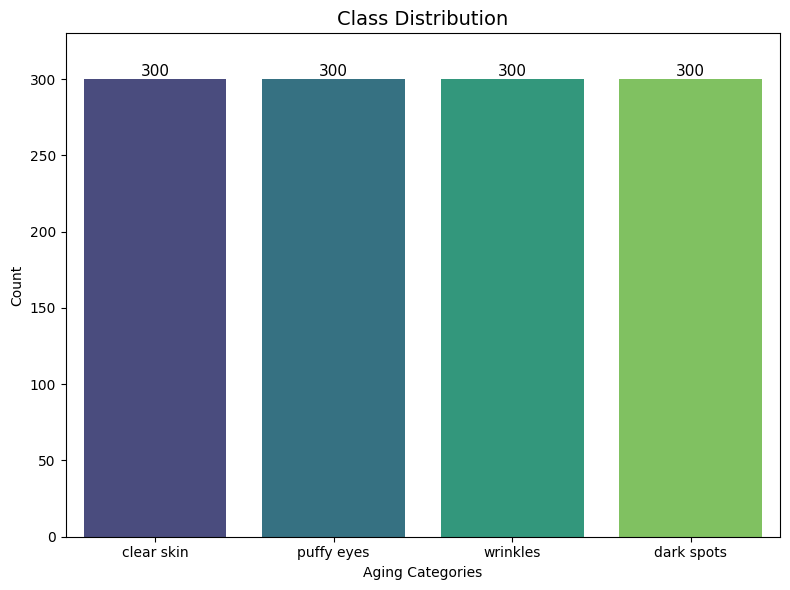


--- Preprocessing Complete ---
Mounting Google Drive...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Output directory set to: /content/gdrive/MyDrive/FacialAgingProject/
Starting image loading and resizing...
Processing class: wrinkles
Processing class: dark spots
Processing class: puffy eyes
Processing class: clear skin

Images (X) shape: (1200, 224, 224, 3) (Range [0, 255])
Labels (y_encoded) shape: (1200, 4) (One-Hot Encoded)
Data saved to: /content/gdrive/MyDrive/FacialAgingProject/X_data_224_rgb.npy
Labels saved to: /content/gdrive/MyDrive/FacialAgingProject/y_labels_one_hot.npy


/tmp/ipython-input-32171410.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.countplot(x=label_names, palette="viridis")


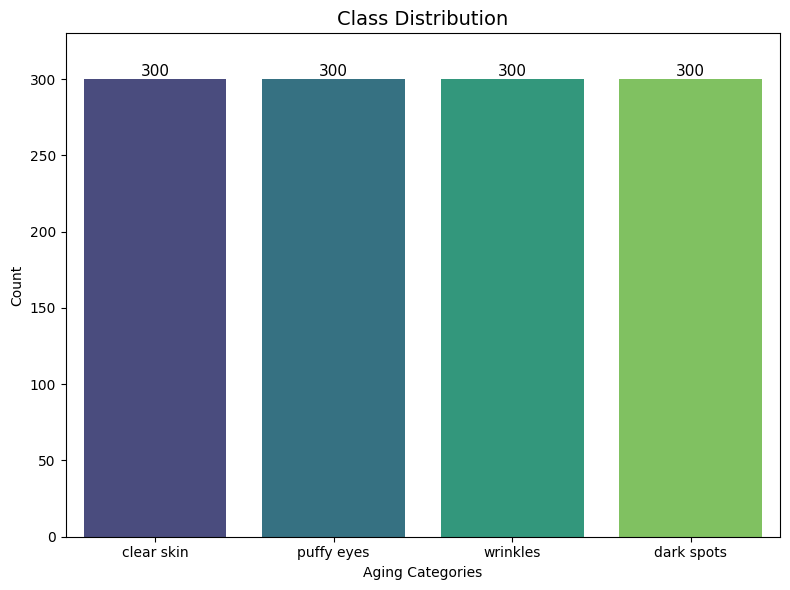


--- Preprocessing Complete ---


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from google.colab import drive

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
BASE_DIR = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/DATASET/')
OUTPUT_DIR = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224
RANDOM_STATE = 42

# --- Mount Drive ---
print("Mounting Google Drive...")
drive.mount(DRIVE_PATH)

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Output directory set to: {OUTPUT_DIR}")

def load_images(data_dir, classes):
    """Loads images, resizes, and converts BGR to RGB."""
    data = []
    labels = []
    label_names_for_plot = []

    print("Starting image loading and resizing...")
    for idx, label in enumerate(classes):
        path = os.path.join(data_dir, label)
        if not os.path.exists(path):
            print(f"ERROR: Path not found: {path}")
            continue

        print(f"Processing class: {label}")
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)

            if img is not None:
                # Convert BGR (OpenCV default) to RGB (Matplotlib/TF default)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

                # Append as float32 in [0, 255] range
                # The EfficientNet preprocessing layer will handle scaling
                data.append(img.astype('float32'))
                labels.append(idx)
                label_names_for_plot.append(label)
            else:
                print(f"Warning: Could not read image {img_name}")

    return np.array(data), np.array(labels), label_names_for_plot

# --- Load, Process, and Save Data ---
X, y, label_names = load_images(BASE_DIR, CLASSES)

# Shuffle the data
X, y, label_names = shuffle(X, y, label_names, random_state=RANDOM_STATE)

# One-hot encode the labels
y_encoded = to_categorical(y, num_classes=len(CLASSES))

print(f"\nImages (X) shape: {X.shape} (Range [0, 255])")
print(f"Labels (y_encoded) shape: {y_encoded.shape} (One-Hot Encoded)")

# --- Save .npy files ---
X_data_path = os.path.join(OUTPUT_DIR, 'X_data_224_rgb.npy')
y_labels_path = os.path.join(OUTPUT_DIR, 'y_labels_one_hot.npy')

np.save(X_data_path, X)
np.save(y_labels_path, y_encoded)

print(f"Data saved to: {X_data_path}")
print(f"Labels saved to: {y_labels_path}")

# --- Visualize Class Distribution (from your original code) ---
plt.figure(figsize=(8, 6))
bars = sns.countplot(x=label_names, palette="viridis")
plt.title("Class Distribution", fontsize=14)
plt.xlabel("Aging Categories")
plt.ylabel("Count")
plt.ylim(0, max(np.bincount(y)) * 1.1) # Set ylim dynamically

for bar in bars.patches:
    bars.annotate(f'{int(bar.get_height())}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=11, color='black')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'class_distribution_plot.png'))
plt.show()

print("\n--- Preprocessing Complete ---")

Mounting Google Drive...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Loading preprocessed dataset...
Data loaded. X shape: (1200, 224, 224, 3), y shape: (1200, 4)
Dataset Split | Train: (960, 224, 224, 3), Val: (240, 224, 224, 3)
Class Weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0)}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 224, 224,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 224, 224,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 224, 224,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,378,535 (16.70 MB)

 Trainable params: 328,964 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)


--- Stage 1: Training classification head ---


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40

Epoch 1: val_accuracy improved from -inf to 0.82500, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 115s - 2s/step - accuracy: 0.6740 - loss: 0.8530 - val_accuracy: 0.8250 - val_loss: 0.5577
Epoch 2/40

Epoch 2: val_accuracy improved from 0.82500 to 0.83750, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 100s - 2s/step - accuracy: 0.7885 - loss: 0.5817 - val_accuracy: 0.8375 - val_loss: 0.5360
Epoch 3/40

Epoch 3: val_accuracy improved from 0.83750 to 0.84167, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 141s - 2s/step - accuracy: 0.8115 - loss: 0.5526 - val_accuracy: 0.8417 - val_loss: 0.4552
Epoch 4/40

Epoch 4: val_accuracy did not improve from 0.84167
60/60 - 95s - 2s/step - accuracy: 0.8271 - loss: 0.4857 - val_accuracy: 0.8375 - val_loss: 0.4551
Epoch 5/40

Epoch 5: val_accuracy improved from 0.84167 to 0.84583, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 94s - 2s/step - accuracy: 0.8500 - loss: 0.4390 - val_accuracy: 0.8458 - val_loss: 0.4943
Epoch 6/40

Epoch 6: val_accuracy did not improve from 0.84583
60/60 - 141s - 2s/step - accuracy: 0.8698 - loss: 0.3992 - val_accuracy: 0.8375 - val_loss: 0.4540
Epoch 7/40

Epoch 7: val_accuracy improved from 0.84583 to 0.85000, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 94s - 2s/step - accuracy: 0.8604 - loss: 0.4254 - val_accuracy: 0.8500 - val_loss: 0.4195
Epoch 8/40

Epoch 8: val_accuracy improved from 0.85000 to 0.87500, saving model to /content/gdrive/MyDrive/FacialAgingProject/stage1_best.h5


60/60 - 141s - 2s/step - accuracy: 0.8646 - loss: 0.4202 - val_accuracy: 0.8750 - val_loss: 0.4540
Epoch 9/40

Epoch 9: val_accuracy did not improve from 0.87500
60/60 - 92s - 2s/step - accuracy: 0.8875 - loss: 0.3622 - val_accuracy: 0.8625 - val_loss: 0.4236
Epoch 10/40

Epoch 10: val_accuracy did not improve from 0.87500
60/60 - 91s - 2s/step - accuracy: 0.8635 - loss: 0.3904 - val_accuracy: 0.8667 - val_loss: 0.3859
Epoch 11/40

Epoch 11: val_accuracy did not improve from 0.87500
60/60 - 96s - 2s/step - accuracy: 0.8875 - loss: 0.3565 - val_accuracy: 0.8667 - val_loss: 0.4260
Epoch 12/40

Epoch 12: val_accuracy did not improve from 0.87500
60/60 - 138s - 2s/step - accuracy: 0.8813 - loss: 0.3529 - val_accuracy: 0.8708 - val_loss: 0.4161
Epoch 13/40

Epoch 13: val_accuracy did not improve from 0.87500
60/60 - 93s - 2s/step - accuracy: 0.8750 - loss: 0.3579 - val_accuracy: 0.8667 - val_loss: 0.3884
Epoch 14/40

Epoch 14: val_accuracy did not improve from 0.87500
60/60 - 143s - 2s/step

60/60 - 151s - 3s/step - accuracy: 0.7448 - loss: 0.7347 - val_accuracy: 0.8500 - val_loss: 0.4406 - learning_rate: 1.0000e-05
Epoch 17/80

Epoch 17: val_accuracy did not improve from 0.85000
60/60 - 112s - 2s/step - accuracy: 0.7875 - loss: 0.6125 - val_accuracy: 0.8458 - val_loss: 0.4628 - learning_rate: 1.0000e-05
Epoch 18/80

Epoch 18: val_accuracy improved from 0.85000 to 0.85417, saving model to /content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5


60/60 - 148s - 2s/step - accuracy: 0.7875 - loss: 0.6407 - val_accuracy: 0.8542 - val_loss: 0.4794 - learning_rate: 1.0000e-05
Epoch 19/80

Epoch 19: val_accuracy improved from 0.85417 to 0.85833, saving model to /content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5



Epoch 19: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.
60/60 - 116s - 2s/step - accuracy: 0.8094 - loss: 0.5847 - val_accuracy: 0.8583 - val_loss: 0.4847 - learning_rate: 1.0000e-05
Epoch 20/80

Epoch 20: val_accuracy did not improve from 0.85833
60/60 - 139s - 2s/step - accuracy: 0.7979 - loss: 0.5740 - val_accuracy: 0.8542 - val_loss: 0.4902 - learning_rate: 5.0000e-06
Epoch 21/80

Epoch 21: val_accuracy did not improve from 0.85833
60/60 - 143s - 2s/step - accuracy: 0.7958 - loss: 0.5855 - val_accuracy: 0.8542 - val_loss: 0.4896 - learning_rate: 5.0000e-06
Epoch 22/80

Epoch 22: val_accuracy did not improve from 0.85833

Epoch 22: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-06.
60/60 - 114s - 2s/step - accuracy: 0.8146 - loss: 0.5293 - val_accuracy: 0.8583 - val_loss: 0.4877 - learning_rate: 5.0000e-06
Epoch 23/80

Epoch 23: val_accuracy did not improve from 0.85833
60/60 - 141s - 2s/step - accuracy: 0.8042 - loss: 0.5620 - val_accuracy: 0.8

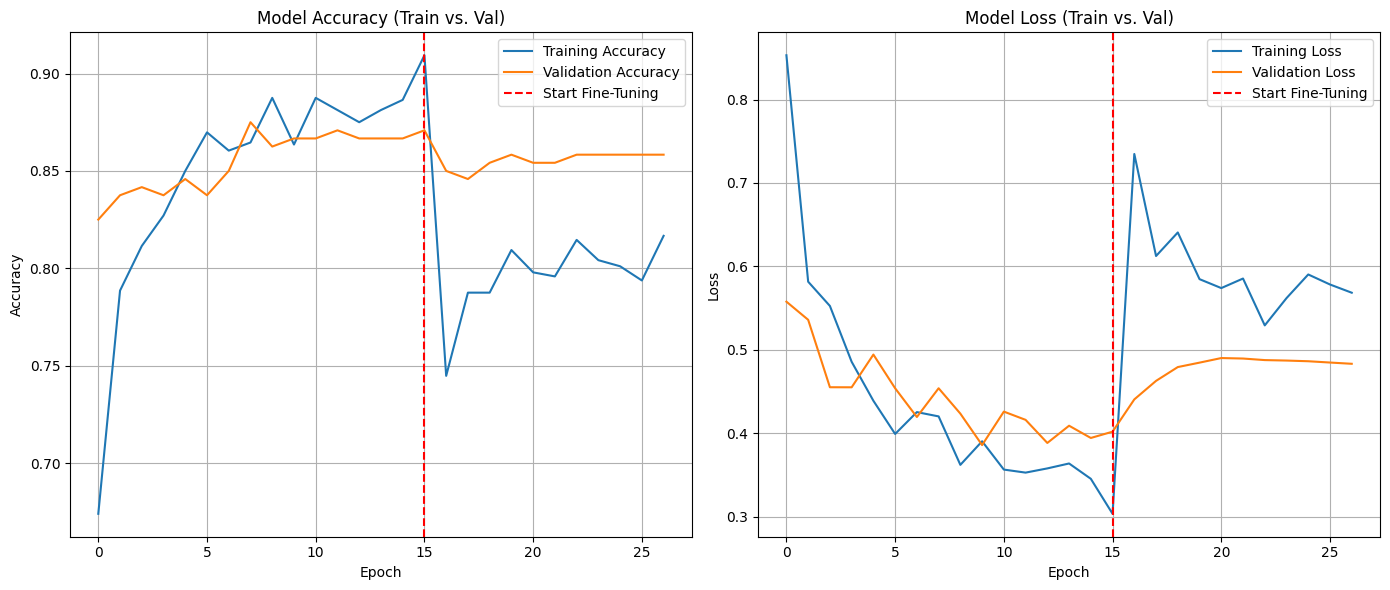

Loading best fine-tuned model for final evaluation...

Generating classification report and confusion matrix...
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step
Classification Report:
              precision    recall  f1-score   support

    wrinkles       0.81      0.78      0.80        60
  dark spots       0.93      0.93      0.93        60
  puffy eyes       0.82      0.75      0.78        60
  clear skin       0.87      0.97      0.91        60

    accuracy                           0.86       240
   macro avg       0.86      0.86      0.86       240
weighted avg       0.86      0.86      0.86       240



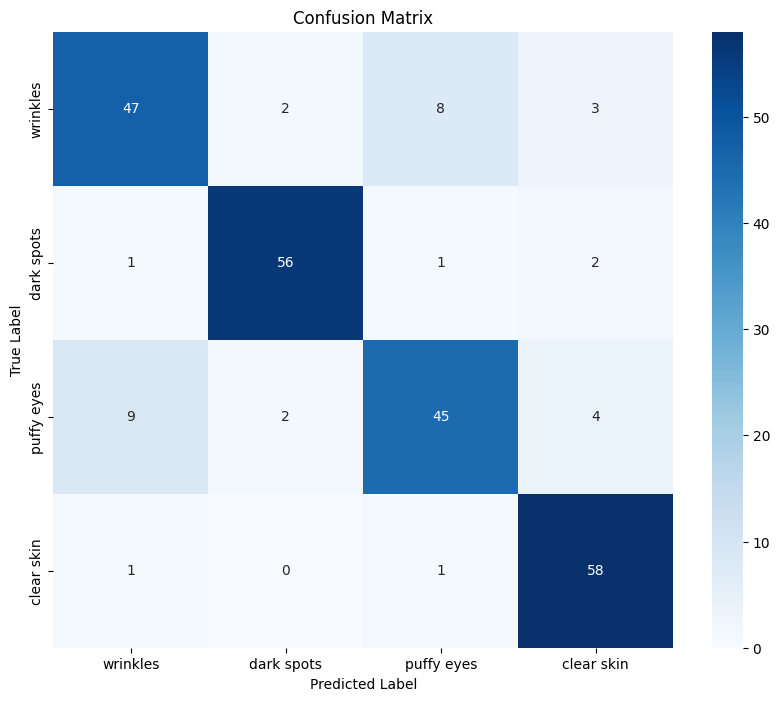


--- Model Training and Evaluation Complete ---


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
DATA_PATH = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
MODEL_PATH = os.path.join(DATA_PATH, 'final_efficientnet_model.h5')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
NUM_CLASSES = len(CLASSES)
IMG_SIZE = 224
RANDOM_STATE = 42

# --- Hyperparameters ---
INITIAL_LR = 1e-3
FINE_TUNE_LR = 1e-5
BATCH_SIZE = 16
EPOCHS_STAGE1 = 40  # Initial training
EPOCHS_STAGE2 = 40  # Fine-tuning (can be increased)

# --- Mount Drive ---
print("Mounting Google Drive...")
drive.mount(DRIVE_PATH)

# --- Load Preprocessed Data ---
print("Loading preprocessed dataset...")
try:
    X = np.load(os.path.join(DATA_PATH, 'X_data_224_rgb.npy'))
    y_encoded = np.load(os.path.join(DATA_PATH, 'y_labels_one_hot.npy'))
except FileNotFoundError:
    raise FileNotFoundError("Data files not found. Run the PREPROCESSING script first.")

# CRITICAL: Ensure data is float32, but KEEP [0, 255] range
X = X.astype('float32')
print(f"Data loaded. X shape: {X.shape}, y shape: {y_encoded.shape}")

# --- Split Data ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=RANDOM_STATE, stratify=y_encoded
)
print(f"Dataset Split | Train: {X_train.shape}, Val: {X_val.shape}")

# --- Class Weights ---
y_train_labels = np.argmax(y_train, axis=1)
class_weights_val = compute_class_weight(
    'balanced', classes=np.arange(NUM_CLASSES), y=y_train_labels
)
class_weights = dict(enumerate(class_weights_val))
print(f"Class Weights: {class_weights}")

# --- Data Augmentation Generators ---
# 1. Training Generator (with augmentation)
datagen_train = ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = datagen_train.flow(X_train, y_train, batch_size=BATCH_SIZE)

# 2. Validation Generator (NO augmentation)
datagen_val = ImageDataGenerator() # No augmentations
val_generator = datagen_val.flow(X_val, y_val, batch_size=BATCH_SIZE, shuffle=False)

# --- Build Model ---
def build_model(input_shape=(224, 224, 3), num_classes=4):
    """Builds the EfficientNetB0 model with an input preprocessing layer."""
    preprocess_input = tf.keras.applications.efficientnet.preprocess_input

    inputs = Input(shape=input_shape)

    # This layer handles the [0, 255] -> [-1, 1] scaling
    x = preprocess_input(inputs)

    base_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = False  # Freeze base model

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(1e-4))(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model, base_model

model, base_model = build_model()
model.summary()

# --- Stage 1: Training Classification Head ---
print("\n--- Stage 1: Training classification head ---")
model.compile(
    optimizer=Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_stage1 = [
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint(
        os.path.join(DATA_PATH, 'stage1_best.h5'),
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

steps_per_epoch = len(X_train) // BATCH_SIZE
validation_steps = len(X_val) // BATCH_SIZE

history_stage1 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=EPOCHS_STAGE1,
    class_weight=class_weights,
    callbacks=callbacks_stage1,
    verbose=2
)

# --- Stage 2: Fine-Tuning ---
print("\n--- Stage 2: Fine-tuning EfficientNet layers ---")
model.load_weights(os.path.join(DATA_PATH, 'stage1_best.h5'))
base_model.trainable = True

# Unfreeze the top 30 layers.
FINE_TUNE_AT = -30
for layer in base_model.layers[:FINE_TUNE_AT]:
    layer.trainable = False
print(f"Fine-tuning: Unfreezing the top {abs(FINE_TUNE_AT)} layers.")

model.compile(
    optimizer=Adam(learning_rate=FINE_TUNE_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

callbacks_stage2 = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint(MODEL_PATH, monitor='val_accuracy', save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7)
]

total_epochs = EPOCHS_STAGE1 + EPOCHS_STAGE2

history_stage2 = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=total_epochs,
    initial_epoch=history_stage1.epoch[-1],
    class_weight=class_weights,
    callbacks=callbacks_stage2,
    verbose=2
)

print(f"\nTraining Complete. Final model saved to: {MODEL_PATH}")

# ==========================================================
# 📊 PLOTTING AND EVALUATION
# ==========================================================

# --- 1. Plot Training & Validation Curves ---
def plot_history(history1, history2):
    """Combines and plots the history from two training stages."""
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']

    epochs_stage1 = len(history1.history['accuracy'])

    plt.figure(figsize=(14, 6))

    # Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.axvline(epochs_stage1 - 1, color='red', linestyle='--', label='Start Fine-Tuning')
    plt.title('Model Accuracy (Train vs. Val)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.axvline(epochs_stage1 - 1, color='red', linestyle='--', label='Start Fine-Tuning')
    plt.title('Model Loss (Train vs. Val)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(os.path.join(DATA_PATH, 'training_curves.png'))
    plt.show()

print("\nGenerating training history plots...")
plot_history(history_stage1, history_stage2)

# --- 2. Confusion Matrix and Classification Report ---
def plot_confusion_matrix(model, x_val, y_val_one_hot, class_names):
    """Plots the confusion matrix and prints a classification report."""
    print("\nGenerating classification report and confusion matrix...")

    # Predict on the validation set
    # We predict on X_val directly since the model has preprocessing built-in
    y_pred = model.predict(x_val)

    # Convert from one-hot to class index
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_true_classes = np.argmax(y_val_one_hot, axis=1)

    # Print Classification Report
    print("Classification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true_classes, y_pred_classes)

    # Plot Confusion Matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.savefig(os.path.join(DATA_PATH, 'confusion_matrix.png'))
    plt.show()

# Load the best *final* model to be sure
print("Loading best fine-tuned model for final evaluation...")
model.load_weights(MODEL_PATH)
plot_confusion_matrix(model, X_val, y_val, CLASSES)

print("\n--- Model Training and Evaluation Complete ---")

Mounting Google Drive to load the model...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Loading saved model from: /content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5


✅ Model loaded successfully.

Please upload an image from your local computer.


Saving ClearSkin.jpg to ClearSkin.jpg

--- Analyzing image: ClearSkin.jpg ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

      PREDICTION: CLEAR SKIN
      CONFIDENCE: 97.31%

All Scores:
- wrinkles: 1.34%
- dark spots: 0.21%
- puffy eyes: 1.15%
- clear skin: 97.31%


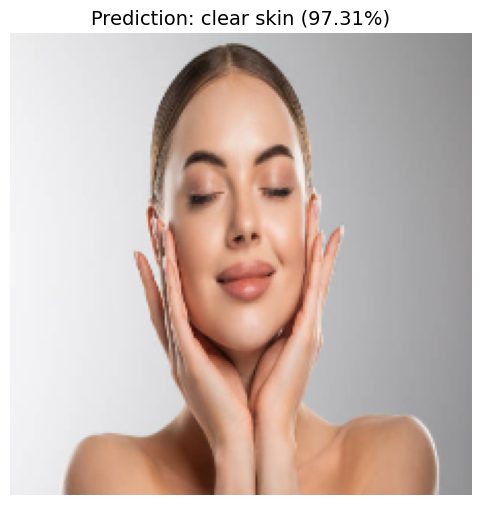

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive, files
from tensorflow.keras.models import load_model

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
DATA_PATH = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
MODEL_PATH = os.path.join(DATA_PATH, 'final_efficientnet_model.h5')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224

# --- Mount Drive ---
print("Mounting Google Drive to load the model...")
drive.mount(DRIVE_PATH)

# --- Load Model ---
print(f"Loading saved model from: {MODEL_PATH}")
model = None
if os.path.exists(MODEL_PATH):
    try:
        model = load_model(MODEL_PATH)
        print("✅ Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print(f"Error: Model file not found at {MODEL_PATH}")
    print("Please ensure the training script ran successfully and the model is saved.")

def predict_image(img_path, model, classes, img_size):
    """Loads, preprocesses, and predicts a single image."""

    print(f"\n--- Analyzing image: {img_path} ---")

    # 1. Load Image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image at {img_path}")
        return

    # 2. Preprocess Image (MUST match training)
    #    - BGR -> RGB
    #    - Resize
    #    - Convert to float32
    #    - KEEP [0, 255] RANGE
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))
    img_processed = img_resized.astype('float32')

    # 3. Create a Batch
    #    (H, W, C) -> (1, H, W, C)
    img_batch = np.expand_dims(img_processed, axis=0)

    # 4. Predict
    #    The model's internal 'preprocess_input' layer handles the scaling.
    predictions = model.predict(img_batch)

    # 5. Decode Predictions
    pred_index = np.argmax(predictions[0])
    pred_class = classes[pred_index]
    confidence = np.max(predictions[0]) * 100

    print(f"\n===================================")
    print(f"      PREDICTION: {pred_class.upper()}")
    print(f"      CONFIDENCE: {confidence:.2f}%")
    print(f"===================================")

    # Print all class scores for debugging
    print("\nAll Scores:")
    for i, class_name in enumerate(classes):
        print(f"- {class_name}: {predictions[0][i]*100:.2f}%")

    # 6. Display Image
    #    Divide by 255 *only* for plotting with plt.imshow
    plt.figure(figsize=(6, 6))
    plt.imshow(img_resized / 255.0)
    plt.title(f"Prediction: {pred_class} ({confidence:.2f}%)", fontsize=14)
    plt.axis('off')
    plt.show()

# ==========================================================
# 🚀 UPLOAD AND PREDICT
# ==========================================================
if model is not None:
    print("\nPlease upload an image from your local computer.")

    # This will open a file upload dialog in Colab
    uploaded = files.upload()

    if len(uploaded) == 0:
        print("No file was uploaded.")
    else:
        # Get the filename of the first uploaded file
        uploaded_filename = list(uploaded.keys())[0]

        # The file is now in the Colab runtime's local storage.
        # We can pass its filename directly to our prediction function.
        predict_image(uploaded_filename, model, CLASSES, IMG_SIZE)
else:
    print("\nModel was not loaded. Cannot run prediction.")

Mounting Google Drive to load the model...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Loading saved model from: /content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5


✅ Model loaded successfully.

Please upload an image from your local computer.


Saving Puffyeyes.jpg to Puffyeyes.jpg

--- Analyzing image: Puffyeyes.jpg ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

      PREDICTION: PUFFY EYES
      CONFIDENCE: 59.66%

All Scores:
- wrinkles: 24.05%
- dark spots: 4.20%
- puffy eyes: 59.66%
- clear skin: 12.09%


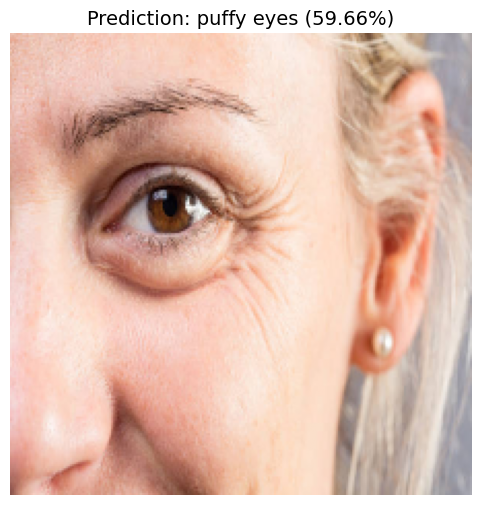

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive, files
from tensorflow.keras.models import load_model

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
DATA_PATH = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
MODEL_PATH = os.path.join(DATA_PATH, 'final_efficientnet_model.h5')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224

# --- Mount Drive ---
print("Mounting Google Drive to load the model...")
drive.mount(DRIVE_PATH)

# --- Load Model ---
print(f"Loading saved model from: {MODEL_PATH}")
model = None
if os.path.exists(MODEL_PATH):
    try:
        model = load_model(MODEL_PATH)
        print("✅ Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print(f"Error: Model file not found at {MODEL_PATH}")
    print("Please ensure the training script ran successfully and the model is saved.")

def predict_image(img_path, model, classes, img_size):
    """Loads, preprocesses, and predicts a single image."""

    print(f"\n--- Analyzing image: {img_path} ---")

    # 1. Load Image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image at {img_path}")
        return

    # 2. Preprocess Image (MUST match training)
    #    - BGR -> RGB
    #    - Resize
    #    - Convert to float32
    #    - KEEP [0, 255] RANGE
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))
    img_processed = img_resized.astype('float32')

    # 3. Create a Batch
    #    (H, W, C) -> (1, H, W, C)
    img_batch = np.expand_dims(img_processed, axis=0)

    # 4. Predict
    #    The model's internal 'preprocess_input' layer handles the scaling.
    predictions = model.predict(img_batch)

    # 5. Decode Predictions
    pred_index = np.argmax(predictions[0])
    pred_class = classes[pred_index]
    confidence = np.max(predictions[0]) * 100

    print(f"\n===================================")
    print(f"      PREDICTION: {pred_class.upper()}")
    print(f"      CONFIDENCE: {confidence:.2f}%")
    print(f"===================================")

    # Print all class scores for debugging
    print("\nAll Scores:")
    for i, class_name in enumerate(classes):
        print(f"- {class_name}: {predictions[0][i]*100:.2f}%")

    # 6. Display Image
    #    Divide by 255 *only* for plotting with plt.imshow
    plt.figure(figsize=(6, 6))
    plt.imshow(img_resized / 255.0)
    plt.title(f"Prediction: {pred_class} ({confidence:.2f}%)", fontsize=14)
    plt.axis('off')
    plt.show()

# ==========================================================
# 🚀 UPLOAD AND PREDICT
# ==========================================================
if model is not None:
    print("\nPlease upload an image from your local computer.")

    # This will open a file upload dialog in Colab
    uploaded = files.upload()

    if len(uploaded) == 0:
        print("No file was uploaded.")
    else:
        # Get the filename of the first uploaded file
        uploaded_filename = list(uploaded.keys())[0]

        # The file is now in the Colab runtime's local storage.
        # We can pass its filename directly to our prediction function.
        predict_image(uploaded_filename, model, CLASSES, IMG_SIZE)
else:
    print("\nModel was not loaded. Cannot run prediction.")

Mounting Google Drive to load the model...
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Loading saved model from: /content/gdrive/MyDrive/FacialAgingProject/final_efficientnet_model.h5


✅ Model loaded successfully.

Please upload an image from your local computer.


Saving ModelValidation (2).jpg to ModelValidation (2).jpg

--- Analyzing image: ModelValidation (2).jpg ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

      PREDICTION: CLEAR SKIN
      CONFIDENCE: 45.93%

All Scores:
- wrinkles: 1.78%
- dark spots: 15.38%
- puffy eyes: 36.91%
- clear skin: 45.93%


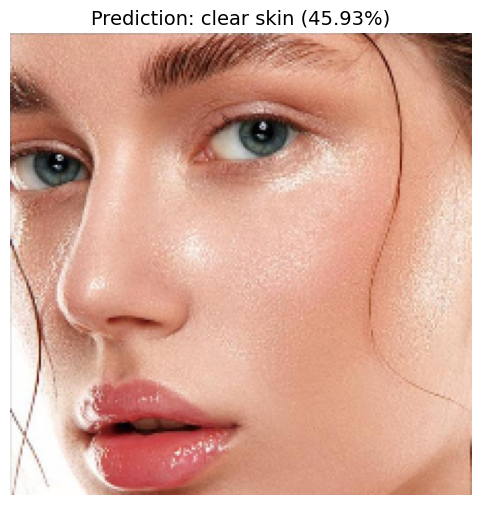

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive, files
from tensorflow.keras.models import load_model

# --- Configuration ---
DRIVE_PATH = '/content/gdrive'
DATA_PATH = os.path.join(DRIVE_PATH, 'MyDrive/FacialAgingProject/')
MODEL_PATH = os.path.join(DATA_PATH, 'final_efficientnet_model.h5')
CLASSES = ['wrinkles', 'dark spots', 'puffy eyes', 'clear skin']
IMG_SIZE = 224

# --- Mount Drive ---
print("Mounting Google Drive to load the model...")
drive.mount(DRIVE_PATH)

# --- Load Model ---
print(f"Loading saved model from: {MODEL_PATH}")
model = None
if os.path.exists(MODEL_PATH):
    try:
        model = load_model(MODEL_PATH)
        print("✅ Model loaded successfully.")
    except Exception as e:
        print(f"Error loading model: {e}")
else:
    print(f"Error: Model file not found at {MODEL_PATH}")
    print("Please ensure the training script ran successfully and the model is saved.")

def predict_image(img_path, model, classes, img_size):
    """Loads, preprocesses, and predicts a single image."""

    print(f"\n--- Analyzing image: {img_path} ---")

    # 1. Load Image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Could not read image at {img_path}")
        return

    # 2. Preprocess Image (MUST match training)
    #    - BGR -> RGB
    #    - Resize
    #    - Convert to float32
    #    - KEEP [0, 255] RANGE
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))
    img_processed = img_resized.astype('float32')

    # 3. Create a Batch
    #    (H, W, C) -> (1, H, W, C)
    img_batch = np.expand_dims(img_processed, axis=0)

    # 4. Predict
    #    The model's internal 'preprocess_input' layer handles the scaling.
    predictions = model.predict(img_batch)

    # 5. Decode Predictions
    pred_index = np.argmax(predictions[0])
    pred_class = classes[pred_index]
    confidence = np.max(predictions[0]) * 100

    print(f"\n===================================")
    print(f"      PREDICTION: {pred_class.upper()}")
    print(f"      CONFIDENCE: {confidence:.2f}%")
    print(f"===================================")

    # Print all class scores for debugging
    print("\nAll Scores:")
    for i, class_name in enumerate(classes):
        print(f"- {class_name}: {predictions[0][i]*100:.2f}%")

    # 6. Display Image
    #    Divide by 255 *only* for plotting with plt.imshow
    plt.figure(figsize=(6, 6))
    plt.imshow(img_resized / 255.0)
    plt.title(f"Prediction: {pred_class} ({confidence:.2f}%)", fontsize=14)
    plt.axis('off')
    plt.show()

# ==========================================================
# 🚀 UPLOAD AND PREDICT
# ==========================================================
if model is not None:
    print("\nPlease upload an image from your local computer.")

    # This will open a file upload dialog in Colab
    uploaded = files.upload()

    if len(uploaded) == 0:
        print("No file was uploaded.")
    else:
        # Get the filename of the first uploaded file
        uploaded_filename = list(uploaded.keys())[0]

        # The file is now in the Colab runtime's local storage.
        # We can pass its filename directly to our prediction function.
        predict_image(uploaded_filename, model, CLASSES, IMG_SIZE)
else:
    print("\nModel was not loaded. Cannot run prediction.")